In [2]:
%matplotlib inline


# Plot the decision surface of a decision tree on the iris dataset

Plot the decision surface of a decision tree trained on pairs
of features of the iris dataset.

See `decision tree <tree>` for more information on the estimator.

For each pair of iris features, the decision tree learns decision
boundaries made of combinations of simple thresholding rules inferred from
the training samples.

We also show the tree structure of a model built on all of the features.


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
np.c_[xx.ravel(), yy.ravel()][1]

array([ 0.02, -0.9 ])

Automatically created module for IPython interactive environment


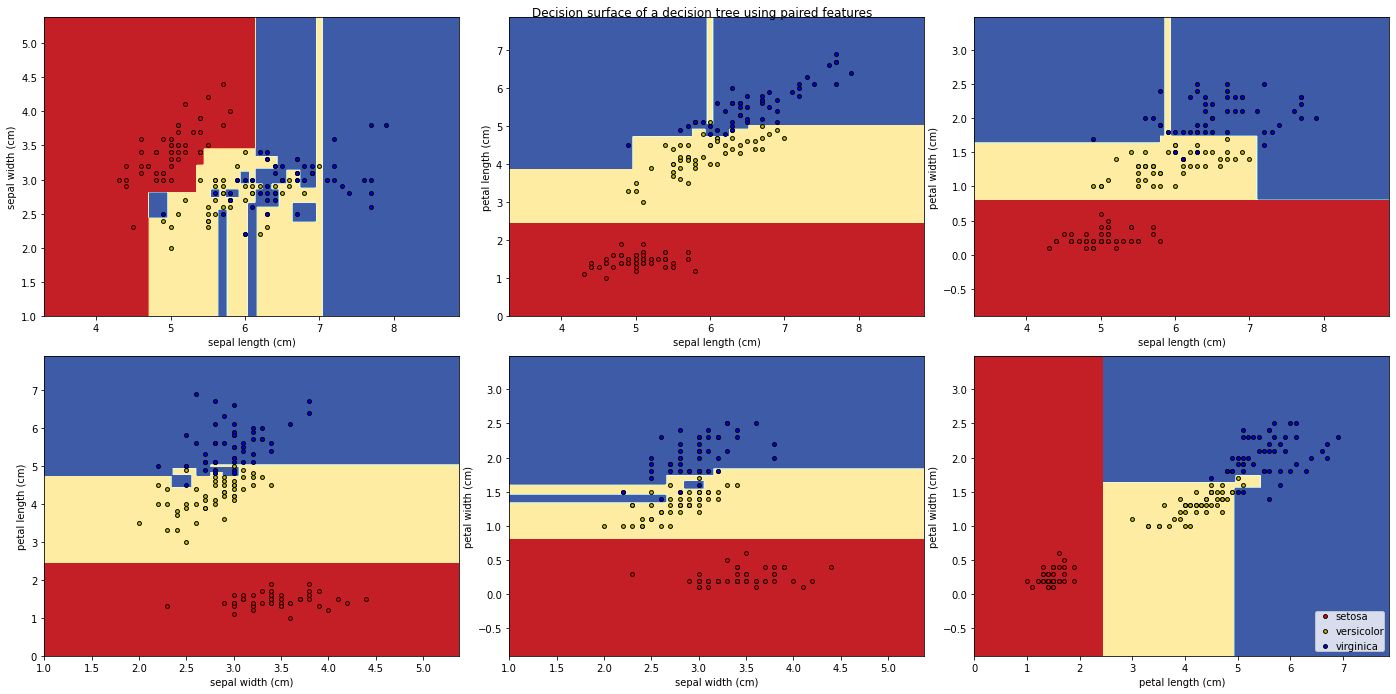

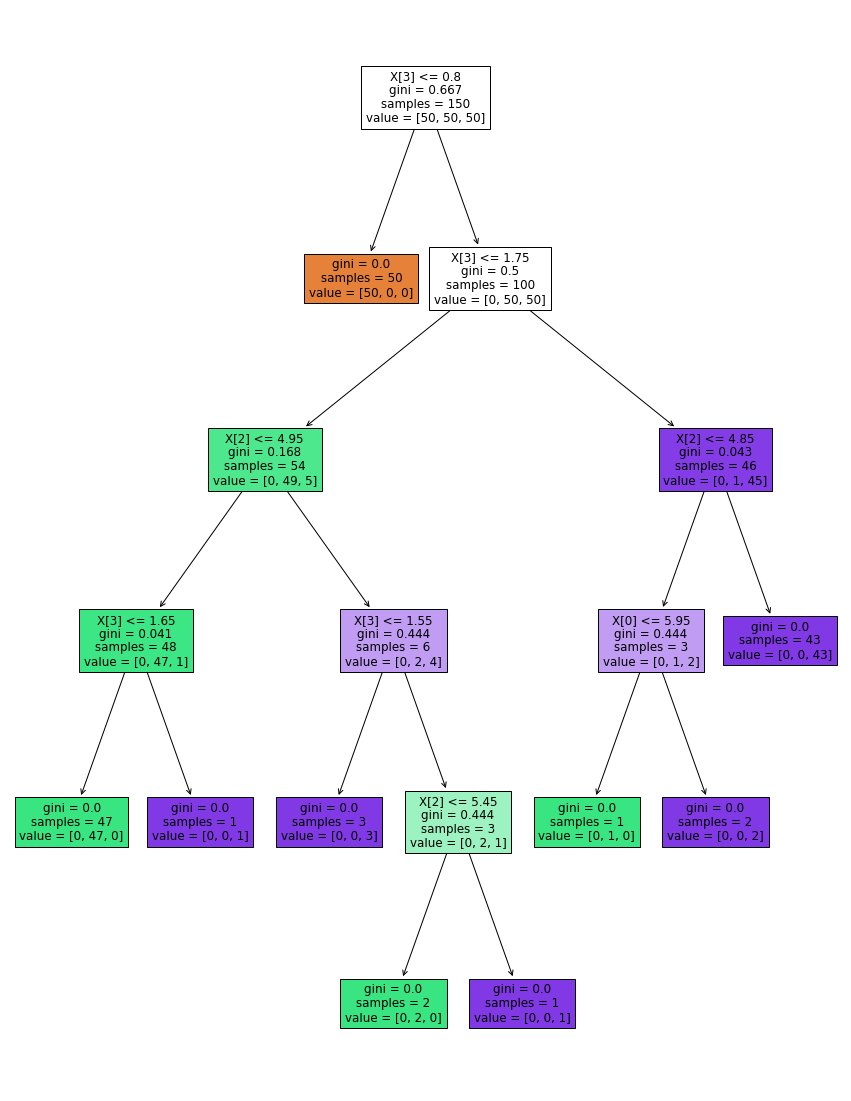

In [70]:
print(__doc__)


# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02
plt.figure(figsize=(20,10))

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(15,20))
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

# Change the maximum depth of the grown tree

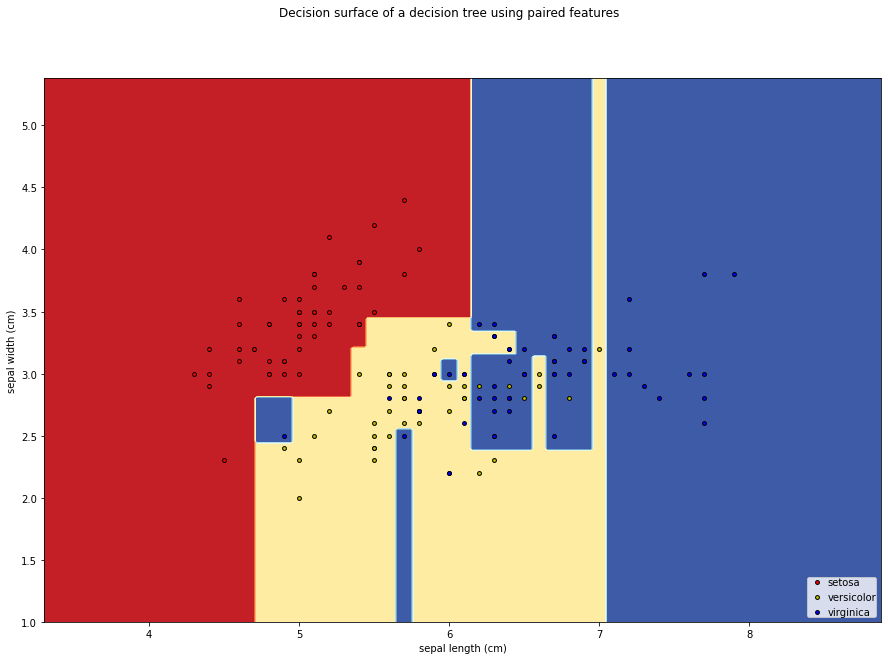

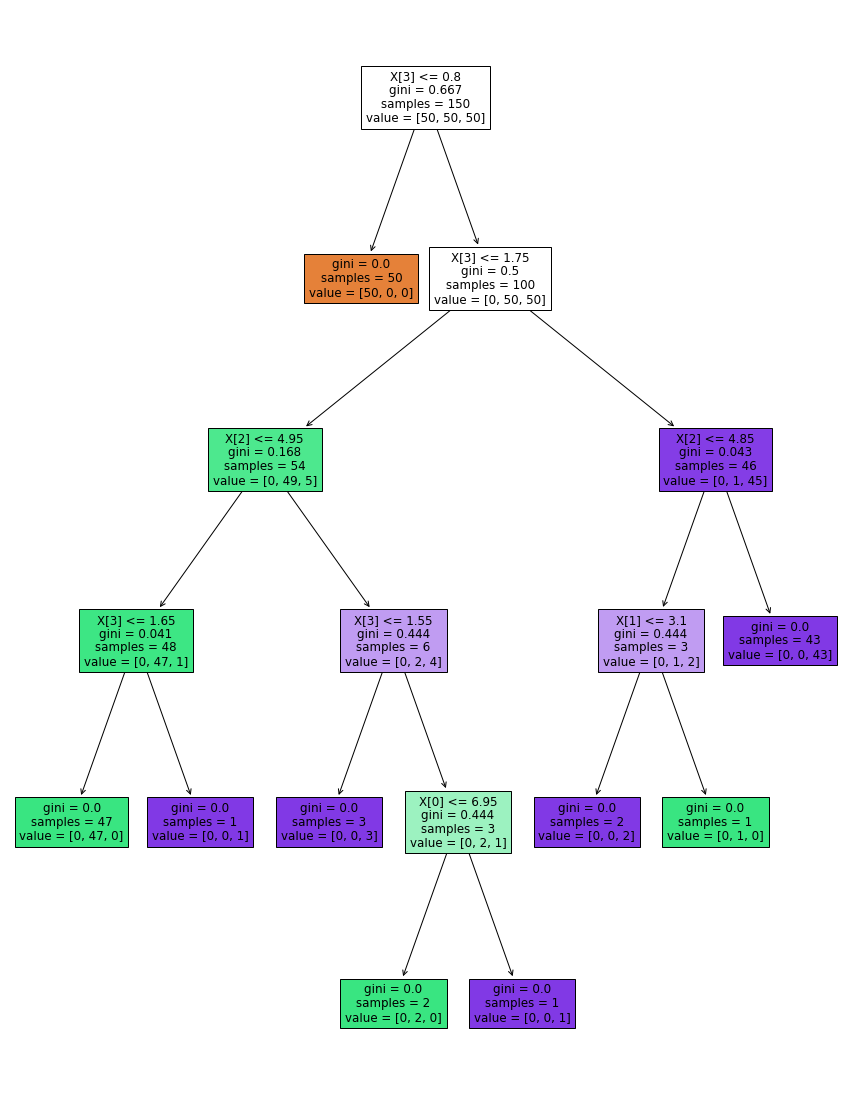

In [68]:

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

pair = [0,1]
# We only take the two corresponding features
X = iris.data[:, pair]
y = iris.target
max_depth = 8
# Train
clf = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)


x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.figure(figsize=(15,10))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

plt.xlabel(iris.feature_names[pair[0]])
plt.ylabel(iris.feature_names[pair[1]])

# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure(figsize=(15,20))
clf = DecisionTreeClassifier(max_depth=max_depth).fit(iris.data, iris.target)
plot_tree(clf, filled=True)
plt.show()

## Reducing Calculation Complexity:

In [51]:
size=5000
lst = np.random.random((size))
# lst = np.arange(size)

In [60]:
%%timeit
for i in range(1,size):
    ms = np.mean(lst[:i])

42.7 ms ± 4.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [61]:
%%timeit
msx = lst[0]
for i in range(2,size):
    ms = (msx * (i-1) + lst[i-1]) / i
    msx = ms

4.97 ms ± 655 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [58]:
%%timeit
mf = lst[0]
for i in range(1,size):
    mf = (mf * (i-1) + lst[i-1])/i
#   ms = np.mean(lst[:i])
#   if ms != mf:   print(ms-mf)


4.83 ms ± 608 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## Prediction Trees on 3 different datasets

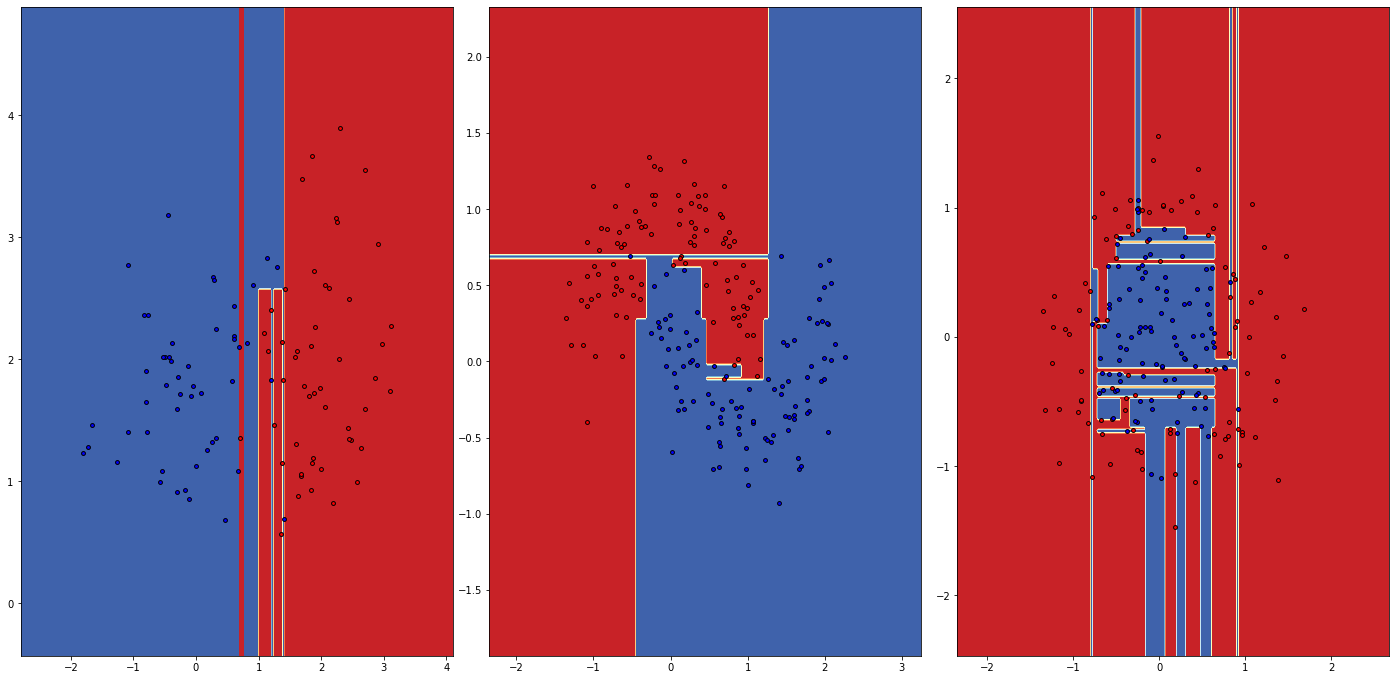

In [77]:
plot_step = 0.02
plot_colors = "rb"

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)
datasets = [linearly_separable,
            make_moons(n_samples = 200, noise=0.2, random_state=0),
            make_circles(n_samples = 200, noise=0.3, factor=0.5, random_state=1)
            ]


fig, ax = plt.subplots(1, 3, figsize=(20,10))
for fi in range(len(datasets)):
    dataset = datasets[fi]
    X = dataset[0]
    y = dataset[1]
    n_classes = len(np.unique(y))
    
    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(1, 3, fi + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
    
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)
        

train score: 1.0
test score: 0.8787878787878788


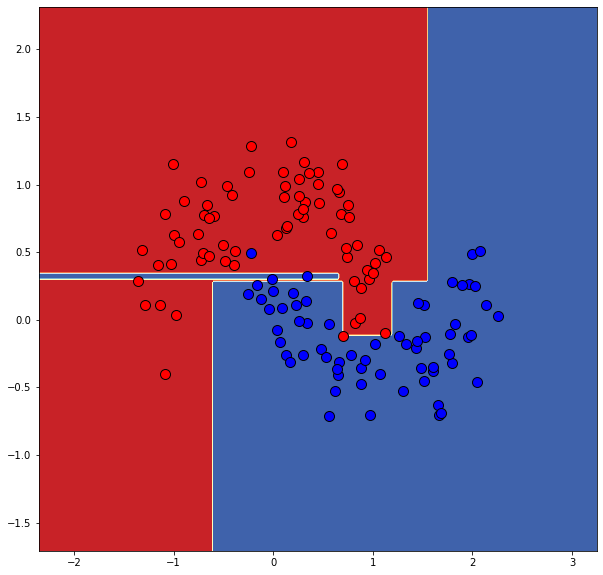

In [171]:
from sklearn.model_selection import train_test_split
dataset = datasets[1]
X = dataset[0]
y = dataset[1]
X, X_test, y, y_test = train_test_split( X, y, test_size=0.33)

max_depth = 8
# Train
clf = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.figure(figsize=(10,10)) 
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)

print("train score:", clf.score(X,y))
print("test score:", clf.score(X_test,y_test))

# Variance

By setting k=None the trees are gown until the impurity in each leave is 0. There will be high variance (little chnges in the dataset cause large changes in the final decission of the tree). See how the decission forntier changes from run to run of the following code.

train score: 1.0
test score: 0.696969696969697


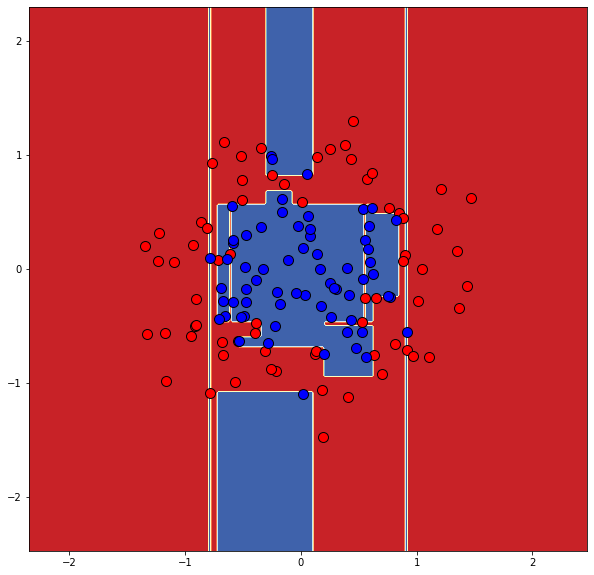

In [173]:
from sklearn.model_selection import train_test_split
dataset = datasets[2]
X = dataset[0]
y = dataset[1]
X, X_test, y, y_test = train_test_split( X, y, test_size=0.33)

max_depth = None
# Train
clf = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.figure(figsize=(10,10)) 
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,cmap=plt.cm.RdYlBu, edgecolor='black', s=100)

print("train score:", clf.score(X,y))
print("test score:", clf.score(X_test,y_test))

# Other models

train score: 1.0
test score: 0.75


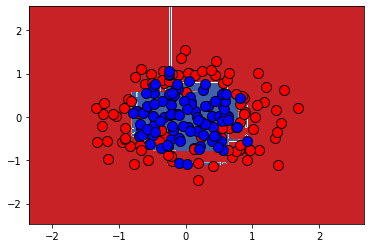

In [208]:
dataset = datasets[2]
X = dataset[0]
y = dataset[1]
max_depth = 2
# Train
#clf = DecisionTreeClassifier(max_depth=max_depth).fit(X, y)
rand_for = RandomForestClassifier(max_depth=max_depth, n_estimators=100, max_features=2, oob_score=True).fit(X, y)
clf = AdaBoostClassifier(base_estimator=rand_for).fit(X, y)
    
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))
plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# Plot the training points
for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=color,
                cmap=plt.cm.RdYlBu, edgecolor='black', s=100)

print("train score:", clf.score(X,y))
print("test score:", rand_for.oob_score_)